In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving page-blocks.csv to page-blocks.csv


In [3]:
dataset = pd.read_csv('page-blocks.csv')
dataset.head()

,5,7,35,1.4,0.4,0.657,2.33,14,23,6,1
0,6,7,42,1.167,0.429,0.881,3.60,18,37,5,1
1,6,18,108,3.000,0.287,0.741,4.43,31,80,7,1
2,5,7,35,1.400,0.371,0.743,4.33,13,26,3,1
3,6,3,18,0.500,0.500,0.944,2.25,9,17,4,1
4,5,8,40,1.600,0.550,1.000,2.44,22,40,9,1


In [4]:

dataset.shape

(5472, 11)

In [5]:
dataset.isnull().sum()

5        0
7        0
35       0
1.4      0
0.4      0
0.657    0
2.33     0
14       0
23       0
6        0
1        0
dtype: int64

In [ ]:
# sns.countplot(x = 'Room_Occupancy_Count', data=dataset)


In [7]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[: , -1]

In [8]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.2359775 , -0.71989172, -0.23850988, ..., -0.27394194,
        -0.37430091, -0.60776789],
       [-0.2359775 , -0.62400301, -0.22489981, ..., -0.26370833,
        -0.35144655, -0.59581352],
       [-0.28871895, -0.71989172, -0.23995337, ..., -0.27787794,
        -0.38014738, -0.61972226],
       ...,
       [-0.2359775 ,  0.04721792, -0.12962934, ..., -0.15350024,
        -0.11811951, -0.01602655],
       [-0.18323605, -0.42350845, -0.18798766, ..., -0.24009231,
        -0.27172205, -0.36868048],
       [-0.1304946 , -0.77219465, -0.24552113, ..., -0.28181394,
        -0.38971432, -0.63167664]])

In [9]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [10]:
samples

[(       5    7    35     1.4    0.4  0.657   2.33   14    23    6
  4767   8  131  1048  16.375  0.246  0.796   1.46  258   834  177
  4331  11  141  1551  12.818  0.366  0.790   2.85  567  1225  199
  5293   9  134  1206  14.889  0.216  0.680   1.65  260   820  158
  2630   8    8    64   1.000  0.500  1.000   2.91   32    64   11
  900    8    6    48   0.750  0.542  0.646  13.00   26    31    2
  ...   ..  ...   ...     ...    ...    ...    ...  ...   ...  ...
  4931   6   96   576  16.000  0.351  0.755   2.43  202   435   83
  3264   8   23   184   2.875  0.353  0.826   1.91   65   152   34
  1653   7   13    91   1.857  0.264  0.648   1.41   24    59   17
  2607   8   82   656  10.250  0.402  0.991   2.10  264   650  126
  2732   8   31   248   3.875  0.415  1.000   1.87  103   248   55
  
  [3830 rows x 10 columns],
         5    7    35      1.4    0.4  0.657   2.33   14    23    6
  1984   7   40   280    5.714  0.311  0.939   1.43   87   263   61
  1399   7   10    70    1.42

In [11]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])
     

In [12]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [13]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]
     

Best Accuracy =  0.92 Best Kernel =  rbf Best Nu =  8.96 Best Epsilon =  3.13
Best Accuracy =  0.92 Best Kernel =  rbf Best Nu =  0.99 Best Epsilon =  2.24
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  4.16 Best Epsilon =  3.03
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  9.19 Best Epsilon =  6.17
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  0.36 Best Epsilon =  6.92
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  7.45 Best Epsilon =  9.36
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  4.89 Best Epsilon =  5.2
Best Accuracy =  0.89 Best Kernel =  rbf Best Nu =  5.79 Best Epsilon =  6.7
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  7.98 Best Epsilon =  9.72
Best Accuracy =  0.89 Best Kernel =  rbf Best Nu =  8.63 Best Epsilon =  1.32


In [14]:

result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.92,rbf,8.96,3.13
1,2,0.92,rbf,0.99,2.24
2,3,0.90,rbf,4.16,3.03
3,4,0.91,rbf,9.19,6.17
4,5,0.90,rbf,0.36,6.92
5,6,0.91,rbf,7.45,9.36
6,7,0.91,rbf,4.89,5.20
7,8,0.89,rbf,5.79,6.70
8,9,0.91,rbf,7.98,9.72
9,10,0.89,rbf,8.63,1.32


In [15]:

X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [16]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [17]:
train_sizes

array([  34,  104,  173,  243,  313,  382,  452,  521,  591,  661,  730,
        800,  870,  939, 1009, 1079, 1148, 1218, 1288, 1357, 1427, 1496,
       1566, 1636, 1705, 1775, 1845, 1914, 1984, 2054, 2123, 2193, 2263,
       2332, 2402, 2471, 2541, 2611, 2680, 2750, 2820, 2889, 2959, 3029,
       3098, 3168, 3238, 3307, 3377, 3447])

In [18]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

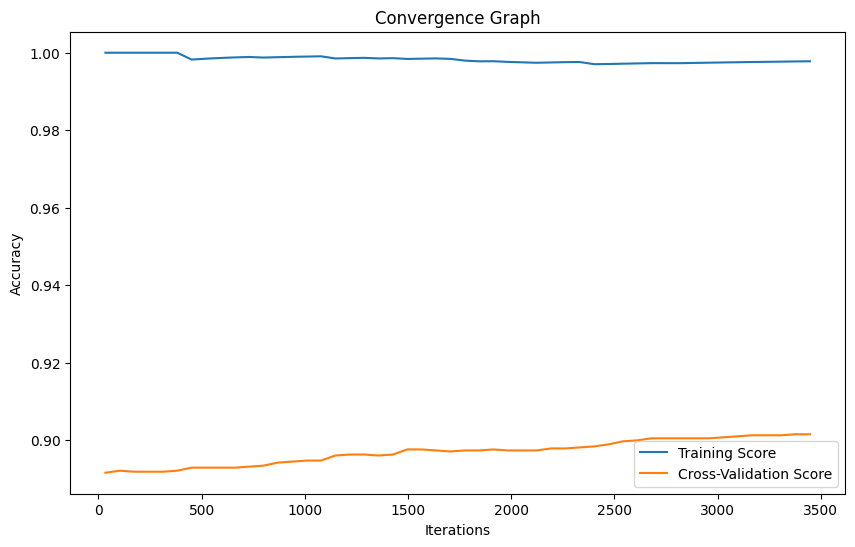

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()
     